<h1>Module 16 Project Template</h1>

Use the code below to help you analyze the data returned by the MBTA API:

In [1]:
mbtaURL = "https://api-v3.mbta.com/vehicles?filter[route]=1&include=trip"

import urllib.request, json
with urllib.request.urlopen(mbtaURL) as url:
    rowData = json.loads(url.read().decode())
   
    with open('data.json', 'w') as outfile:
        json.dump(rowData, outfile)
   
    with open('data.txt', 'w') as outfile:
        json.dump(json.dumps(rowData, indent=4, sort_keys=True), outfile)
    bdata = json.dumps(rowData, indent=4, sort_keys=True)  
    print(bdata)


{
    "data": [
        {
            "attributes": {
                "bearing": 36,
                "current_status": "IN_TRANSIT_TO",
                "current_stop_sequence": 3,
                "direction_id": 0,
                "label": "1877",
                "latitude": 42.332127339,
                "longitude": -71.081502889,
                "occupancy_status": "FEW_SEATS_AVAILABLE",
                "speed": null,
                "updated_at": "2023-04-26T08:53:52-04:00"
            },
            "id": "y1877",
            "links": {
                "self": "/vehicles/y1877"
            },
            "relationships": {
                "route": {
                    "data": {
                        "id": "1",
                        "type": "route"
                    }
                },
                "stop": {
                    "data": {
                        "id": "2",
                        "type": "stop"
                    }
                },
                "trip

In [2]:
num_vehicles = len(rowData['included'])
num_vehicles

8

Use the code below to read the data from your MySQL database and store it in a pandas dataframe.  

You you need to install pymysql to run the code:

pip install pymysql

In [3]:
import os
import pymysql
import pandas as pd

host = '127.0.0.1'
port = '5306'
user = 'root'
password = 'password'
database = 'MBTAdb'

conn = pymysql.connect(
    host=host,
    port=int(port),
    user="root",
    passwd=password,
    db=database,
    charset='utf8mb4')

df = pd.read_sql_query("SELECT * FROM mbta_buses",
    conn)

df

C:\Users\Lagger\AppData\Local\Temp\ipykernel_24380\77182786.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("SELECT * FROM mbta_buses",


,record_num,id,latitude,longitude,current_status,current_stop_sequence,direction_id,label,occupancy_status,speed,...,trip_id,bikes_allowed,block_id,headsign,wheelchair_accessible,route_data_id,route_data_type,route_pattern_id,route_pattern_type,shape_id
0,1,y1877,42.332904,-71.081041,None,22,1,1877,FEW_SEATS_AVAILABLE,None,...,55800960,1,trip,Harvard,1,1,route,1-_-0,route_pattern,010111
1,2,y1851,42.342503,-71.084433,None,11,1,1851,FEW_SEATS_AVAILABLE,None,...,55800334,1,trip,Harvard,1,1,route,1-_-0,route_pattern,010111
2,3,y1839,42.362957,-71.099838,None,8,1,1839,MANY_SEATS_AVAILABLE,None,...,55800962,1,trip,Harvard,1,1,route,1-_-0,route_pattern,010111
3,4,y1826,42.364999,-71.102943,None,18,1,1826,FEW_SEATS_AVAILABLE,None,...,55800332,1,trip,Harvard,1,1,route,1-_-0,route_pattern,010111
4,5,y1824,42.334873,-71.074983,None,7,1,1824,FEW_SEATS_AVAILABLE,None,...,55800336,1,trip,Nubian,1,1,route,1-_-1,route_pattern,010118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,378,y1826,42.371880,-71.118097,None,2,1,1826,FEW_SEATS_AVAILABLE,None,...,55800965,1,trip,Harvard,1,1,route,1-_-0,route_pattern,010111
378,379,y1824,42.341450,-71.082776,None,10,1,1824,FEW_SEATS_AVAILABLE,None,...,55800336,1,trip,Nubian,1,1,route,1-_-1,route_pattern,010118
379,380,y1815,42.329750,-71.083870,None,1,1,1815,MANY_SEATS_AVAILABLE,None,...,55800961,1,trip,Nubian,1,1,route,1-_-1,route_pattern,010118
380,381,y1807,42.346730,-71.087520,None,13,1,1807,FEW_SEATS_AVAILABLE,None,...,55800963,1,trip,Nubian,1,1,route,1-_-1,route_pattern,010118


In [22]:
sql_query = "SELECT id, current_stop_sequence, updated_at, latitude, longitude FROM mbta_buses"
df = pd.read_sql_query(sql_query, conn)
df

C:\Users\Lagger\AppData\Local\Temp\ipykernel_24380\3171790694.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


,id,current_stop_sequence,updated_at,latitude,longitude
0,y1877,22,2023-04-26 12:45:04,42.332904,-71.081041
1,y1851,11,2023-04-26 12:45:08,42.342503,-71.084433
2,y1839,8,2023-04-26 12:45:04,42.362957,-71.099838
3,y1826,18,2023-04-26 12:45:08,42.364999,-71.102943
4,y1824,7,2023-04-26 12:44:45,42.334873,-71.074983
...,...,...,...,...,...
377,y1826,2,2023-04-26 12:54:03,42.371880,-71.118097
378,y1824,10,2023-04-26 12:54:07,42.341450,-71.082776
379,y1815,1,2023-04-26 12:53:44,42.329750,-71.083870
380,y1807,13,2023-04-26 12:54:05,42.346730,-71.087520



The code below saves the data as a csv file to the local directory as a backup.

In [12]:
df['updated_at']

0     2023-04-26 12:45:04
1     2023-04-26 12:45:08
2     2023-04-26 12:45:04
3     2023-04-26 12:45:08
4     2023-04-26 12:44:45
              ...        
377   2023-04-26 12:54:03
378   2023-04-26 12:54:07
379   2023-04-26 12:53:44
380   2023-04-26 12:54:05
381   2023-04-26 12:54:08
Name: updated_at, Length: 382, dtype: datetime64[ns]

In [25]:

df.to_csv('mbta7.csv')

In [27]:
import pandas as pd

# Load CSV file into DataFrame
df = pd.read_csv('mbta6.csv')

# Display first 5 rows of the DataFrame
df

,Unnamed: 0,record_num,id,latitude,longitude,current_status,current_stop_sequence,direction_id,label,occupancy_status,...,trip_id,bikes_allowed,block_id,headsign,wheelchair_accessible,route_data_id,route_data_type,route_pattern_id,route_pattern_type,shape_id
0,0,1,y1769,42.339390,-71.058447,NaN,1,1,1769,NaN,...,55800272,1,trip,Harvard,1,1,route,1-_-0,route_pattern,10111
1,1,2,y1769,42.339046,-71.058339,NaN,1,1,1769,NaN,...,55800272,1,trip,Harvard,1,1,route,1-_-0,route_pattern,10111
2,2,3,y1769,42.339042,-71.058060,NaN,1,1,1769,NaN,...,55800272,1,trip,Harvard,1,1,route,1-_-0,route_pattern,10111
3,3,4,y1769,42.339040,-71.057309,NaN,1,1,1769,NaN,...,55800272,1,trip,Harvard,1,1,route,1-_-0,route_pattern,10111
4,4,5,y1769,42.339441,-71.057071,NaN,1,1,1769,NaN,...,55800272,1,trip,Harvard,1,1,route,1-_-0,route_pattern,10111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32099,32099,32110,y1826,42.341615,-71.083187,NaN,15,1,1826,FEW_SEATS_AVAILABLE,...,55801015,1,trip,Nubian,1,1,route,1-_-1,route_pattern,10118
32100,32100,32111,y1822,42.348825,-71.088775,NaN,13,1,1822,MANY_SEATS_AVAILABLE,...,55800449,1,trip,Nubian,1,1,route,1-_-1,route_pattern,10118
32101,32101,32112,y1802,42.360718,-71.095744,NaN,16,1,1802,FULL,...,55800445,1,trip,Nubian,1,1,route,1-_-1,route_pattern,10118
32102,32102,32113,y1770,42.330374,-71.083940,NaN,24,1,1770,FULL,...,55801013,1,trip,Nubian,1,1,route,1-_-1,route_pattern,10118


In [2]:
from haversine import haversine, Unit
import pandas as pd
import datetime

<h1>What is the average time it takes for a bus to complete the route</h1>

7a. Answer the following question in your Jupyter Notebook submission: What is the average time it takes for a bus to complete Route 1?

In [28]:
def find_successive_occurrences(group):
    result = []
    current = 1
    for index, row in group.iterrows():
        if row['current_stop_sequence'] == current:
            result.append({'id': row['id'], 'updated_at': row['updated_at'], 'current_stop_sequence': row['current_stop_sequence'], 'latitude': row['latitude'], 'longitude': row['longitude']})
            current = 24 if current == 1 else 1
    return pd.DataFrame(result)

# Groupez le DataFrame par 'id' et appliquez la fonction find_successive_occurrences pour chaque groupe
grouped = df.groupby('id')
result_df = pd.concat([find_successive_occurrences(group) for _, group in grouped])

print(result_df)

       id           updated_at  current_stop_sequence   latitude  longitude
0   y1721  2023-04-25 08:31:19                      1  42.341440 -71.058230
1   y1721  2023-04-25 09:51:48                     24  42.330455 -71.083629
2   y1721  2023-04-25 09:52:01                      1  42.329952 -71.084361
3   y1721  2023-04-25 10:31:01                     24  42.372654 -71.116384
4   y1721  2023-04-25 10:31:01                      1  42.372654 -71.116384
..    ...                  ...                    ...        ...        ...
15  y1910  2023-04-25 18:29:59                     24  42.330629 -71.083327
16  y1910  2023-04-25 18:30:22                      1  42.330274 -71.084023
17  y1910  2023-04-25 19:25:51                     24  42.372724 -71.116732
18  y1910  2023-04-25 20:27:11                      1  42.330540 -71.083128
19  y1910  2023-04-25 21:09:15                     24  42.372669 -71.116500

[178 rows x 5 columns]


In [29]:
# Assign result_df to df
df = result_df

# Convert the 'updated_at' column to datetime
df['updated_at'] = pd.to_datetime(df['updated_at'])

# Create a new dataframe with only positions 1 and 24
df_1_24 = df[(df['current_stop_sequence'] == 1) | (df['current_stop_sequence'] == 24)]

# Create a dataframe to store the time between positions 1 and 24 for each id
df_time_1_24_per_id = pd.DataFrame(columns=['id', 'time_1_24'])

# Loop through each id
for id in df_1_24['id'].unique():
    # Filter the dataframe for the current id
    df_id = df_1_24[df_1_24['id'] == id]
    # Loop through each position 1
    for index_1, row_1 in df_id[df_id['current_stop_sequence'] == 1].iterrows():
        # Find the next position 24
        try:
            index_24 = df_id[(df_id.index > index_1) & (df_id['current_stop_sequence'] == 24)].index[0]
            # Calculate the time between positions 1 and 24
            time_1_24 = df_id.loc[index_24, 'updated_at'] - row_1['updated_at']
            # Add the time to the dataframe
            df_time_1_24_per_id = pd.concat([df_time_1_24_per_id, pd.DataFrame({'id': [id], 'time_1_24': [time_1_24]})])
        except IndexError:
            # If the next position 24 does not exist, move on to the next position 1
            continue

# Print the dataframe of the time between positions 1 and 24 for each id
print(df_time_1_24_per_id)

       id       time_1_24
0   y1721 0 days 01:20:29
0   y1721 0 days 00:39:00
0   y1721 0 days 00:29:38
0   y1721 0 days 01:24:40
0   y1721 0 days 01:37:10
..    ...             ...
0   y1910 0 days 00:48:48
0   y1910 0 days 00:38:25
0   y1910 0 days 00:51:30
0   y1910 0 days 00:55:29
0   y1910 0 days 00:42:04

[85 rows x 2 columns]


In [42]:
# Calculate the mean of the 'time_1_24' column
mean_time_1_24 = df_time_1_24_per_id['time_1_24'].mean()

# Calculate the median of the 'time_1_24' column
median_time_1_24 = df_time_1_24_per_id['time_1_24'].median()

# Print the median
print("median value = ", median_time_1_24)

# Print the mean
print("Mean time between positions 1 and 24:")
print(mean_time_1_24)

median value =  0 days 00:48:48
Mean time between positions 1 and 24:
0 days 01:01:53.235294117


In [43]:
median_time_1_24

Timedelta('0 days 00:48:48')

<h1>Give an estimate of the speed of the bus from current_stop_sequence = 1 to the last  current_stop_sequence. </h1> 

Note: You can use the haversine Python library to calculate the distance between two points, given two longitude and latitude coordinates.

In [53]:
from haversine import haversine, Unit
import pandas as pd

# Créer le dataframe
df = result_df

# Créer une colonne pour la latitude et la longitude de la dernière et la première étape
df['last_stop_lat'] = df.groupby('id')['latitude'].shift(1)
df['last_stop_lon'] = df.groupby('id')['longitude'].shift(1)
df.loc[df['current_stop_sequence'] == 1, ['last_stop_lat', 'last_stop_lon']] = (None, None)

# Calculer la distance pour chaque itération
df['distance'] = df.apply(lambda row: haversine(
    (row['last_stop_lat'], row['last_stop_lon']),
    (row['latitude'], row['longitude']),
    unit=Unit.METERS
) if pd.notnull(row['last_stop_lat']) and pd.notnull(row['last_stop_lon']) else None, axis=1)

# Afficher le résultat
print(df[['id', 'updated_at', 'current_stop_sequence', 'distance']])

# Calculer les valeurs maximale, minimale, moyenne et médiane de la colonne 'distance'
max_value = df['distance'].max()
min_value = df['distance'].min()
mean_value = df['distance'].mean()
median_value = df['distance'].median()

# Afficher les valeurs
print("max value = ", str(max_value) + "[m]")
print("min value = ", str(min_value) + "[m]")
print("mean value = ", str(mean_value) + "[m]")
print("median value = ", str(median_value) + "[m]")

       id          updated_at  current_stop_sequence     distance
0   y1721 2023-04-25 08:31:19                      1          NaN
1   y1721 2023-04-25 09:51:48                     24  2418.749715
2   y1721 2023-04-25 09:52:01                      1          NaN
3   y1721 2023-04-25 10:31:01                     24  5428.744392
4   y1721 2023-04-25 10:31:01                      1          NaN
..    ...                 ...                    ...          ...
15  y1910 2023-04-25 18:29:59                     24  5479.773138
16  y1910 2023-04-25 18:30:22                      1          NaN
17  y1910 2023-04-25 19:25:51                     24  5431.924058
18  y1910 2023-04-25 20:27:11                      1          NaN
19  y1910 2023-04-25 21:09:15                     24  5428.171278

[178 rows x 4 columns]
max value =  6082.543572881711[m]
min value =  20.429648894748482[m]
mean value =  4131.147616029133[m]
median value =  5419.046742250816[m]


In [39]:
median_time_1_24

id
y1721     78.441667
y1764     37.283333
y1769     76.766667
y1770     50.983333
y1802     46.225000
y1816     90.458333
y1820     47.516667
y1822     46.450000
y1826     49.483333
y1842     81.991667
y1864    110.716667
y1865     45.658333
y1885     42.716667
y1900     43.050000
y1910     50.150000
Name: time_1_24_min, dtype: float64

In [45]:
#estimate of the speed 

timeSecond = median_time_1_24.total_seconds()

speed = mean_value/timeSecond

#speed in [m/s]

print(f'speed : {speed}[m/s]')
print(f'speed : {speed* 3.6}[km/h]')








speed : 1.4109110710482011[m/s]
speed : 5.079279855773525[km/h]


In [57]:
second_trip.to_csv('second_trip.csv')

<h1>Provide a Visualization based on the data</h1>

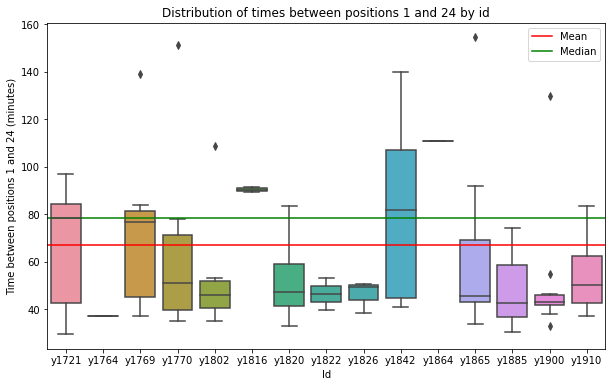

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt


# Convert the 'temps_1_24' column to minutes
df_temps_1_24_par_id['time_1_24_min'] = df_temps_1_24_par_id['temps_1_24'].dt.total_seconds() / 60

# Calculate mean and median time between positions 1 and 24 for each id
mean_time_1_24 = df_temps_1_24_par_id.groupby('id')['time_1_24_min'].mean()
median_time_1_24 = df_temps_1_24_par_id.groupby('id')['time_1_24_min'].median()

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a boxplot of the 'time_1_24_min' column grouped by 'id'
sns.boxplot(x='id', y='time_1_24_min', data=df_temps_1_24_par_id)

# Add mean and median lines to the boxplot
plt.axhline(y=mean_time_1_24[0], color='r', linestyle='-', label='Mean')
plt.axhline(y=median_time_1_24[0], color='g', linestyle='-', label='Median')

# Add labels and title
plt.xlabel('Id')
plt.ylabel('Time between positions 1 and 24 (minutes)')
plt.title('Distribution of times between positions 1 and 24 by id')

# Add legend
plt.legend()

# Show the plot
plt.show()

